In [75]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pylab import cm
import scienceplots

In [76]:
plt.style.use(['science'])

In [77]:
df = pd.read_csv("data.csv", index_col="index")
df

ValueError: Index index invalid

## Creating MSE loss against Epoch figure

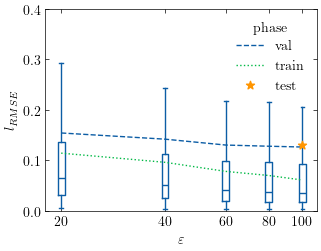

In [42]:
epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()
# ax.plot([],[])

average_mse = df.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i])
    
    colors_blue = dict(color="#0C5DA5")
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=False, widths=width,
                boxprops=colors_blue, medianprops=colors_blue, whiskerprops=colors_blue, capprops=colors_blue)

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
for _ in range(2):
    ax.scatter([], [])
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2)

ax.legend(title='phase')
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 0.4])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch', dpi=1200)

In [18]:
print(average_mse)

    phase  epoch       MSE
0    test     20  0.024423
1    test     40  0.021333
2    test     60  0.018139
3    test     80  0.017780
4    test    100  0.017293
5   train     20  0.013101
6   train     40  0.009277
7   train     60  0.006136
8   train     80  0.004929
9   train    100  0.003753
10    val     20  0.023831
11    val     40  0.020199
12    val     60  0.017023
13    val     80  0.016422
14    val    100  0.016022


## Dataset distribution

In [8]:
df2 = pd.read_csv("space_groups.csv")
df2.index.name = "index"
df2

,ICSD_code,space_group
index,,
0,1000,F m -3 m
1,100018,P -4 3 n
2,10009,F -4 3 m
3,100098,I 2 3
4,100099,I 2 3
...,...,...
12449,9988,F 41 3 2
12450,99963,P m -3 m
12451,99964,P m -3 m


## Examples

STRUCTURES

In [44]:
dataset = os.path.join("..\\datasets\\lacbed")
structures = os.path.join("..\\results\\structure_random0\\test_100\\images")

codes = ["91052", "91224", "159768", "414383"]

colormap = cm.seismic

for i, code in enumerate(codes):
    structure = cv2.imread(
        os.path.join(dataset, code, code + "_structure.png")
    )[:, :, 0]
    im1 = cm.Greys(structure)
    cv2.imwrite(code + "_real.jpg", im1 * 255)
    # axs3[0, i].axis("off")
    # axs3[i, 0].imshow(structure)

    real = cv2.imread(
        os.path.join(dataset, code, code + "_+0+0+0.png")
    )[:, :, 0]
    im2 = cm.grey(real)
    cv2.imwrite(code + "_pattern.jpg", im2 * 255)
    # axs3[1, i].axis("off")
    # axs3[i, 1].imshow(real)

    try:
        fake = cv2.imread(
            os.path.join(results3, code + "_+0+0+0_synthesized_image.png")
        )[:, :, 0]
    except:
        pass
    #     fake = cv2.imread(
    #         os.path.join(results2, code + "_structure_synthesized_image.png")
    #     )[:, :, 0]
    im3 = cm.Greys(fake)
    cv2.imwrite(code + "_fake.jpg", im3 * 255)
    # axs3[2, i].axis("off")
    # axs3[i, 2].imshow(fake)

# for i, j in [(x, y) for x in range(3) for y in range(3)]:
#     plt.setp(axs3[i, j].spines.values(), visible=False)
#     axs3[i, j].set_xticks([])
#     axs3[i, j].set_yticks([])
#     axs3[i, j].patch.set_visible(False)

# plt.subplots_adjust(hspace=0.1, wspace=0)


# fig3.savefig('figures/examples', dpi=300)

PATTERNS

In [73]:
dataset = os.path.join("..\\datasets\\lacbed")
patterns = os.path.join("..\\results\\pattern_random0\\test_100\\images")
patterns2 = os.path.join("..\\results\\pattern_random0\\val_100\\images")

codes = ["152794", "162198", "166923", "194751"]


for i, code in enumerate(codes):
    structure = cv2.imread(
        os.path.join(dataset, code, code + "_structure.png")
    )[:, :, 0]
    im1 = cm.Greys(structure)
    cv2.imwrite(code + "_input.jpg", im1 * 255)

    real = cv2.imread(
        os.path.join(dataset, code, code + "_+0+0+0.png")
    )[:, :, 0]
    im2 = cm.grey(real)
    cv2.imwrite(code + "_real.jpg", im2 * 255)

    try:
        fake = cv2.imread(
            os.path.join(patterns, code + "_structure_synthesized_image.png")
        )[:, :, 0]
    except:
        fake = cv2.imread(
            os.path.join(patterns2, code + "_structure_synthesized_image.png")
        )[:, :, 0]
    
    im3 = cm.grey(fake)
    cv2.imwrite(code + "_fake.jpg", im3 * 255)
        
    difference = np.abs(im3 - im2)
    cv2.imwrite(code + "_diff.jpg", difference * 255)


In [2]:
results_dir = "..\\results\\"
dataset_dir = "..\\datasets\\lacbed\\"
splits_dir = "..\\datasets\\splits\\"

sg = pd.read_csv("space_groups.csv")

groups = set(sg["space_group"].to_list())

differences = {group: np.zeros((128, 128)) for group in groups}
differences_counts = {group: 0 for group in groups}

for seed in (os.listdir(results_dir)):
    for output in os.listdir(os.path.join(results_dir, seed)):
        phase, epoch = output.split("_")#
        
        if phase != "test" or epoch != "100":
            break
        
        print(output)
        
        rms = 0
        for image in os.listdir(os.path.join(results_dir, seed, output, "images")):
            
            code = image.split("_")[0]
            
            fake = cv2.cvtColor(cv2.imread(
                os.path.join(results_dir, seed, output, "images", image)
            ), cv2.COLOR_BGR2GRAY) / 255
            real = cv2.cvtColor(cv2.imread(
                os.path.join(dataset_dir, code, code + "_+0+0+0.png")
            ), cv2.COLOR_BGR2GRAY) / 255
            
            group = sg.loc[sg['ICSD_code'] == int(code), 'space_group'].iloc[0]
            
            diff = (real - fake)**2
            
            differences[group] += diff
            differences_counts[group] += 1

for group in groups:
    differences[group] /= differences_counts[group]

test_100
test_100
test_100
test_100
test_100
test_100


C:\Users\joe\AppData\Local\Temp\ipykernel_29780\3992427454.py:41: RuntimeWarning: invalid value encountered in divide
  differences[group] /= differences_counts[group]


ValueError: If using all scalar values, you must pass an index

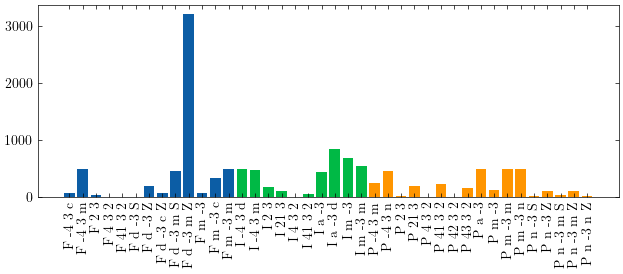

In [17]:
pparam = dict(xlabel=r'space group', ylabel=r'count')
# with plt.style.context(['science', 'grid']):
fig2, ax2 = plt.subplots(figsize=(7.5, 2.5))
plt.xticks(rotation='vertical')
plt.minorticks_off()
df2_count = df2.groupby(["space_group"]).count().reset_index()
df2_count2 = df2_count["space_group"].astype(str).str[0].reset_index()
ax2.bar(df2_count.loc[df2_count2["space_group"] == "F"]["space_group"], df2_count.loc[df2_count2["space_group"] == "F"]["ICSD_code"], label="Face-centered")
ax2.bar(df2_count.loc[df2_count2["space_group"] == "I"]["space_group"], df2_count.loc[df2_count2["space_group"] == "I"]["ICSD_code"], label="Body-centered")
ax2.bar(df2_count.loc[df2_count2["space_group"] == "P"]["space_group"], df2_count.loc[df2_count2["space_group"] == "P"]["ICSD_code"], label="Simple cubic")

losses_by_group = dict()
for group in differences.keys():
    losses_by_group[group] = np.sqrt(np.mean(differences[group]))

df_losses_by_group = pd.DataFrame.from_dict(losses_by_group, index=)
losses_by_group.plot(secondary_y=True)

ax2.legend(ncols=3)
ax2.autoscale(tight=True)
ax2.set(**pparam)
fig2.savefig('figures/space_groups', dpi=300)

C:\Users\joe\AppData\Local\Temp\ipykernel_3468\4020035902.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fign, axn = plt.subplots()


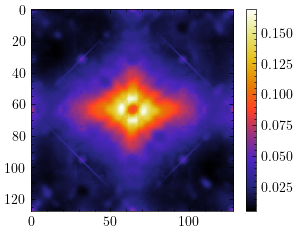

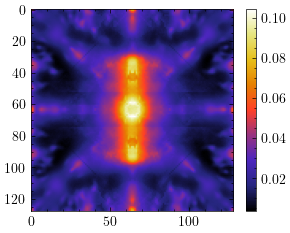

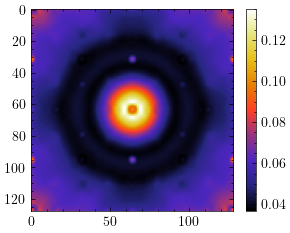

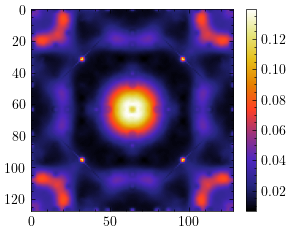

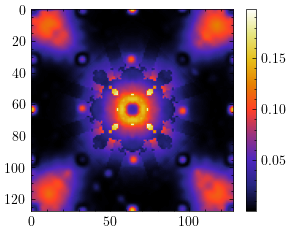

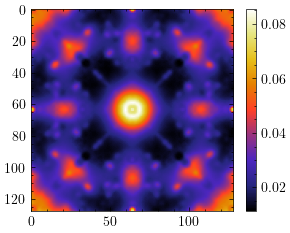

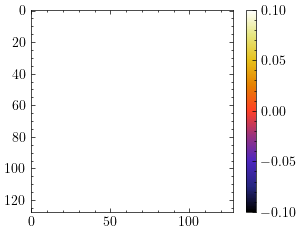

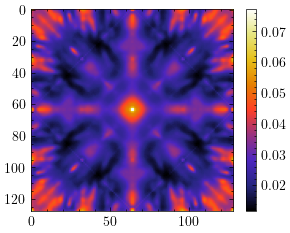

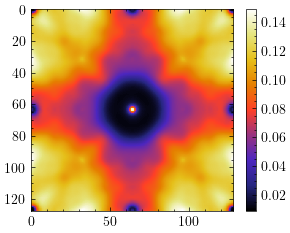

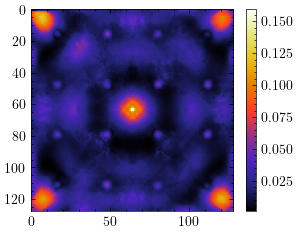

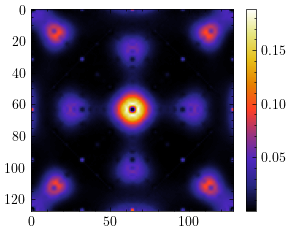

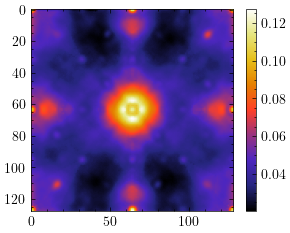

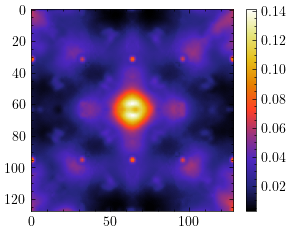

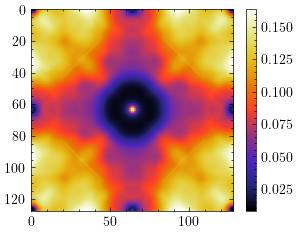

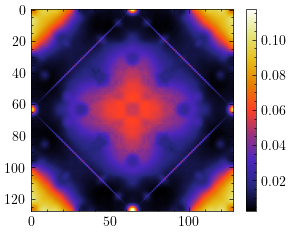

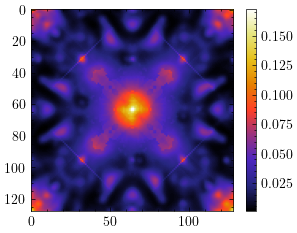

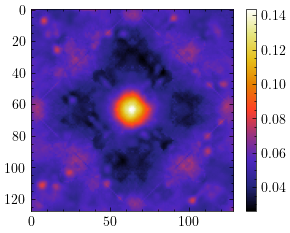

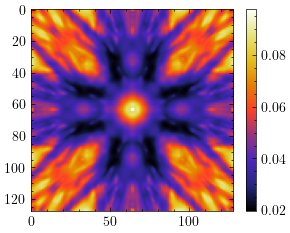

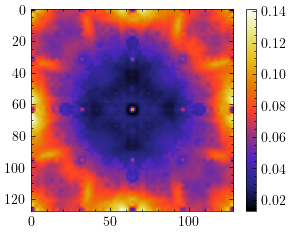

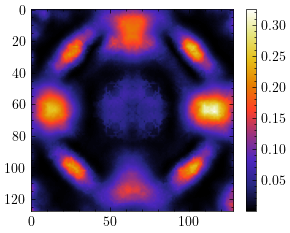

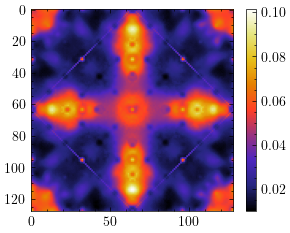

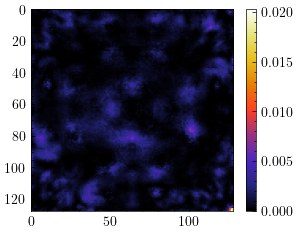

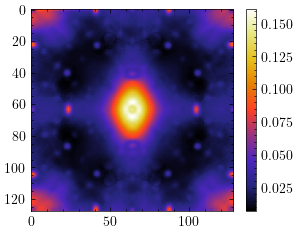

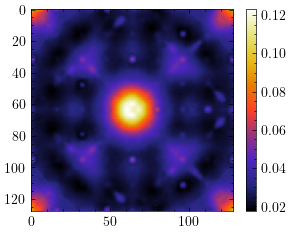

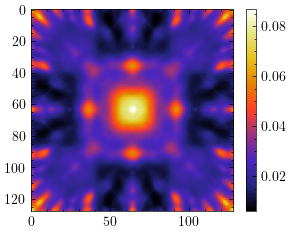

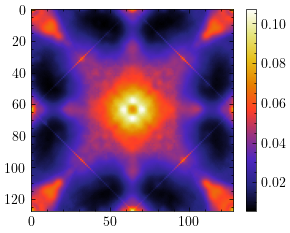

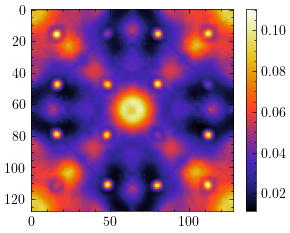

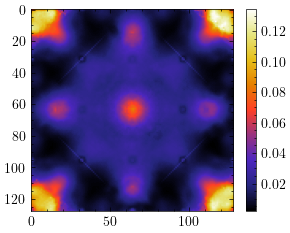

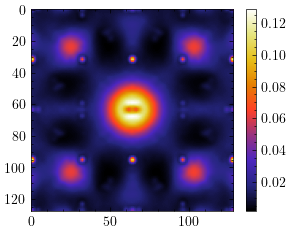

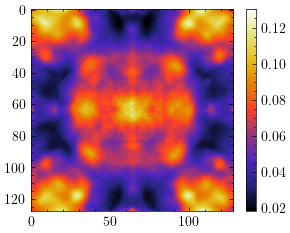

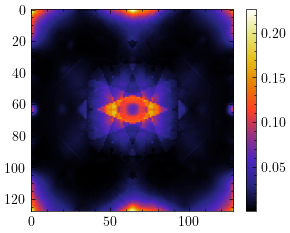

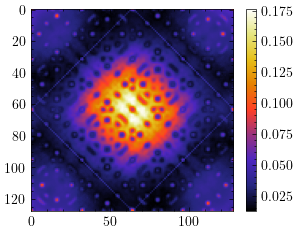

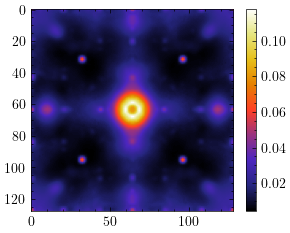

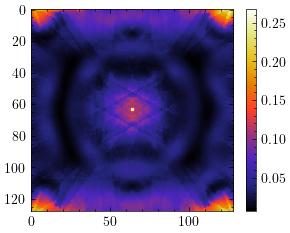

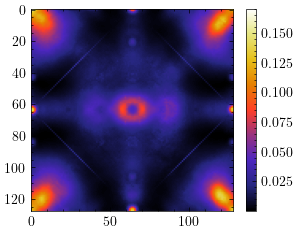

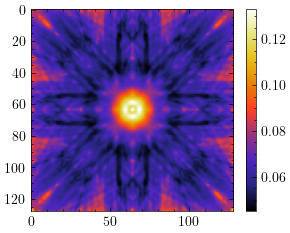

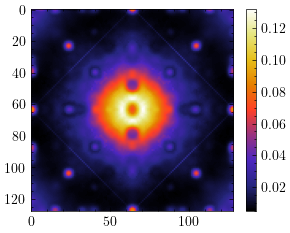

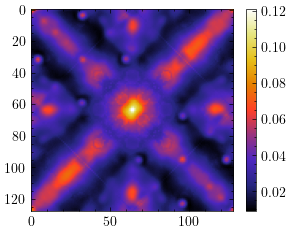

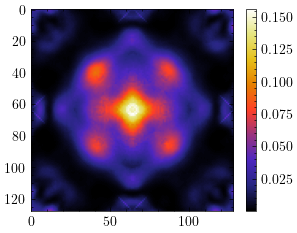

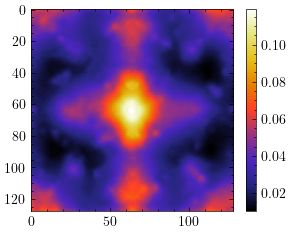

In [94]:
chosen_groups = ["F - 3 m", "F d -3 ", "F 4 3 2"]
for group in groups:
    fign, axn = plt.subplots()
    
    p = plt.imshow(differences[group])
    fig.colorbar(p, ax=axn)
    # plt.clim(0,0.35)
    
    
    fign.savefig(f'figures/{group}_differences', dpi=300)